In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [25]:
import sys
sys.path.append("../")
import data_collection.skeletonnormalization as sn
import data_collection.get_data as gd
from data_collection.find_r import *

In [26]:
# load normalized training data
train = gd.load_data('../pickle/norm_train.p')
# a08_s01_e01_skeleton_proj.txt         hands raised over head
# a10_s06_e02_skeleton_proj.txt         wave
# select a sequence of frames from the training data
action_data = train["a08_s01_e01_skeleton_proj.txt"]

<IPython.core.display.Javascript object>


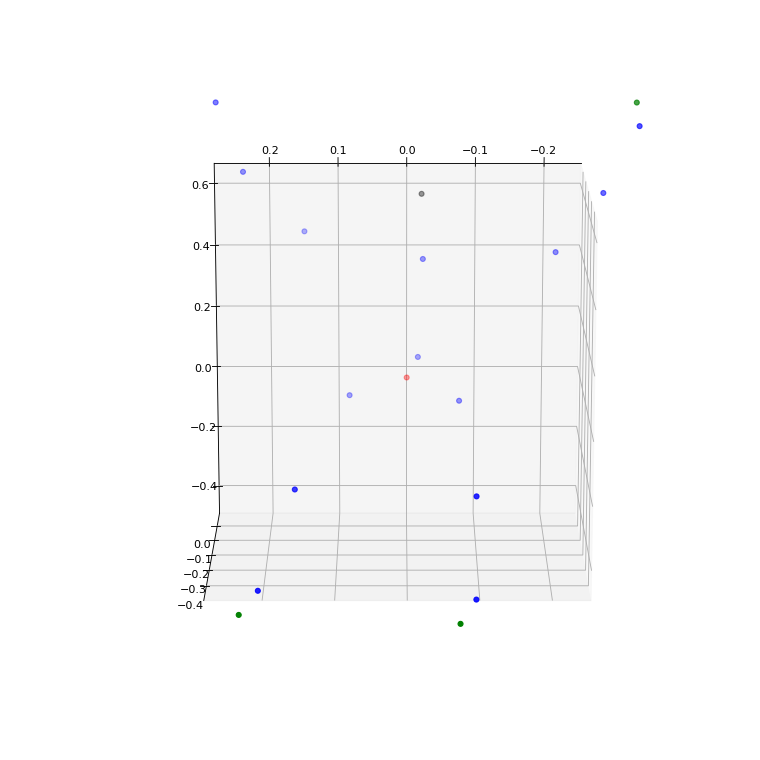

In [27]:
import matplotlib.animation

# get array of all frames without joint number or frame number
all_frames = [np.array(i)[:,2:] for i in action_data]
max_frame = len(all_frames)

def update_graph(frame_data):
    xs, ys, zs = frame_data[:,0], frame_data[:,1], frame_data[:,2]
    graph._offsets3d = (xs, ys, zs)
    return graph
    

fig = plt.figure()
fig.set_size_inches(9.5, 9.5)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(-75,  90)
points = all_frames[0]
graph = ax.scatter(points[:,0], points[:,1], points[:,2], color=colors)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, all_frames, interval=90)